In [3]:
library(ggplot2)
library(ggpubr)
library(ggsci)
library(corrplot)
library(RColorBrewer)
library(ggrepel)
library(argparse)
library(Matrix)
library(data.table)
options(bitmapType = 'cairo', device = 'png')
Sys.setlocale("LC_NUMERIC", "C")

setwd('/psycl/g/mpsziller/lucia/')
out_fold  <- 'priler_project/Figure_CASTom-iGEx_paper/CAD_part2/'

# load clustering result
clust_file <- 'CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/tscore_zscaled_clusterCases_PGmethod_HKmetric.RData'
res_cl <- get(load(clust_file))

# load treatment matrix
treat_file <- 'CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/covariateMatrix_CADHARD_All_phenoAssoc_withMedication.txt'
treatInfo_file <- 'CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeDescription_covariateMatrix_withMedication.txt'
treatDat <- fread(treat_file, h=T, stringsAsFactors = F, data.table = F)
treatInfo <- fread(treatInfo_file, h=T, stringsAsFactors = F, data.table = F)

# load phenotype matrix
pheno_file <- 'CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeMatrix_CADHARD_All_phenoAssoc_withMedication.txt'
phenoInfo_file <- 'CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeDescription_withMedication.txt'
phenoDat <- fread(pheno_file, h=T, stringsAsFactors = F, data.table = F)
phenoInfo <- fread(phenoInfo_file, h=T, stringsAsFactors = F, data.table = F)

# load analysis results
tissue_name <- 'Liver'
treatmentResponsePairwiseFile <- sprintf('CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/withMedication_tscore_zscaled_clusterCases_TreatResponse_pairwise.txt', tissue_name)
res_treat <- fread(treatmentResponsePairwiseFile, h=T, stringsAsFactors = F, data.table = F)

# load original data
phenoOriginal_file <- 'CAD_UKBB/eQTL_PROJECT/INPUT_DATA_GTEx/CAD/Covariates/UKBB/ukb40052_project25214_filtered_britishWhiteUnrelated_pheno.tab'
phenoOriginal <- fread(phenoOriginal_file, h=T, stringsAsFactors = F, data.table = F)
# convert id
id_conv <- fread('/psycl/g/mpsukb/UKBB_hrc_imputation/oxford/samples_unrelated_ukb25214_ukb34217', h=T, stringsAsFactors = F)
phenoOriginal$new_userId <- id_conv$ukb34217[match(phenoOriginal$userId, id_conv$ukb25214)]

[1] "C"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 330 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 330 rows containing missing values (geom_point).”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


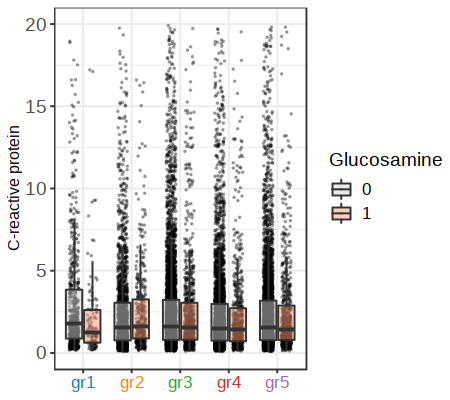

Warning message:
“Removed 330 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 330 rows containing missing values (geom_point).”
Warning message:
“Removed 330 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 330 rows containing missing values (geom_point).”


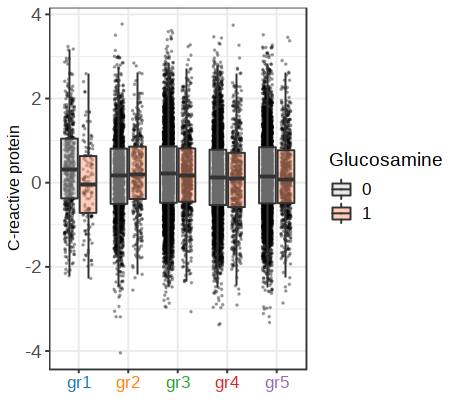

In [4]:
options(repr.plot.width = 4.5, repr.plot.height = 4, repr.plot.res = 100)

# plot specific treatment response
pheno_name <- 'C-reactive protein'
#pheno_name <- 'Platelet crit'
treat_name <- 'Glucosamine'
#a = res_treat[res_treat$pheno_Field %in% pheno_name,]
#a = res_treat
#a[order(a$pvalue_diff)[1:10],]

pheno_id <- phenoInfo$pheno_id[phenoInfo$Field == pheno_name]
treat_id <- treatInfo$pheno_id[treatInfo$Coding_meaning == treat_name]
cl <- res_cl$cl_best

df <- data.frame(id = cl$id, gr = cl$gr, 
                 pheno = phenoDat[match(cl$id, phenoDat$Individual_ID), pheno_id], 
                 pheno_or = phenoOriginal[match(cl$id, paste0('X',phenoOriginal$new_userId)), paste0('x', pheno_id, '_0_0')],
                 treat = treatDat[match(cl$id, treatDat$Individual_ID), paste0('p', treat_id)])

df$gr <- paste0('gr',df$gr)
df$gr <- factor(df$gr, levels = paste0('gr', sort(unique(cl$gr))))
df$treat <- factor(df$treat)
# remove NA values:
df <- df[!is.na(df$treat) & !is.na(df$pheno),]


gr_color <- pal_d3(palette = 'category20')(length(unique(df$gr)))

pl_box_original <-  ggplot(df, aes(x = gr, y = pheno_or, fill = treat))+
  geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
  geom_boxplot(outlier.shape = NA, alpha = 0.5)+
  theme_bw()+ 
  ylim(0,20)+
  ylab(pheno_name)+
  theme(legend.position = 'right', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
 scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

pl_box_original

pl_box <-  ggplot(df, aes(x = gr, y = pheno, fill = treat))+
  geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
  geom_boxplot(outlier.shape = NA, alpha = 0.5)+
  theme_bw()+ 
  ylab(pheno_name)+
  theme(legend.position = 'right', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
 scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

pl_box

# save
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.png', out_fold, pheno_id, treat_id), plot = pl_box_original, width = 4.5, height = 4, dpi = 300)
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', out_fold, pheno_id, treat_id), plot = pl_box_original, width = 4.5, height = 4)

ggsave(filename = sprintf('%sPheno_%s_treat%s.png', out_fold, pheno_id, treat_id), plot = pl_box, width = 4.5, height = 4, dpi = 300)
ggsave(filename = sprintf('%sPheno_%s_treat%s.pdf', out_fold, pheno_id, treat_id), plot = pl_box, width = 4.5, height = 4)


,treat_id,z_diff,pvalue_diff,gr1_beta,gr1_se_beta,gr1_ORorBeta,gr1_CI_low,gr1_CI_up,gr1_pvalue,gr2_beta,⋯,gr2_pvalue,comp,treat_Field,treat_meaning,pheno_id,pheno_Field,pheno_meaning,pheno_type,pheno_class,pvalue_corr_diff
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>
9414,p6179_5,3.991547,6.564363e-05,-0.1585894152,0.09259447,-0.1585894152,-0.34007124,0.02289241,8.683331e-02,-0.6380429,⋯,9.292134e-17,gr4_vs_gr3,Mineral and other dietary supplements,Iron,30020,Haemoglobin concentration,NA,CONTINUOUS,Blood_count,0.005448421
12236,p6179_5,-3.863100,1.119572e-04,-0.6434367306,0.08472516,-0.6434367306,-0.80949499,-0.47737848,3.709664e-14,-0.1585894,⋯,8.683331e-02,gr5_vs_gr4,Mineral and other dietary supplements,Iron,30020,Haemoglobin concentration,NA,CONTINUOUS,Blood_count,0.009292449
3885,p6155_6,-3.764967,1.665713e-04,-0.3491941016,0.08342210,-0.3491941016,-0.51269842,-0.18568978,2.893691e-05,0.4909356,⋯,1.795366e-02,gr5_vs_gr1,Vitamin and mineral supplements,Folic acid or Folate (Vit B9),30750,Glycated haemoglobin (HbA1c),NA,CONTINUOUS,Blood_biochemistry,0.011826564
6156,p6154_2,3.757570,1.715711e-04,0.0008096496,0.03637841,0.0008096496,-0.07049073,0.07211003,9.822442e-01,-0.2478962,⋯,7.691646e-06,gr3_vs_gr2,"Medication for pain relief, constipation, heartburn",Ibuprofen (e.g. Nurofen),47,Hand grip strength (right),NA,CONTINUOUS,Hand_grip_strength,0.013554120
5274,p6155_3,3.712501,2.052213e-04,0.0473836788,0.04966049,0.0473836788,-0.04994909,0.14471644,3.400476e-01,-0.2945598,⋯,1.500541e-04,gr3_vs_gr2,Vitamin and mineral supplements,Vitamin C,30880,Urate,NA,CONTINUOUS,Blood_biochemistry,0.016212485
9561,p6155_4,-3.634808,2.781872e-04,-0.2485379505,0.10884692,-0.2485379505,-0.46187399,-0.03520191,2.245650e-02,0.2701428,⋯,3.430326e-03,gr4_vs_gr3,Vitamin and mineral supplements,Vitamin D,30110,Platelet distribution width,NA,CONTINUOUS,Blood_count,0.023089540
5443,p6154_3,-3.625688,2.881934e-04,0.0445489085,0.03083040,0.0445489085,-0.01587756,0.10497537,1.485216e-01,0.2492257,⋯,1.484977e-07,gr3_vs_gr2,"Medication for pain relief, constipation, heartburn",Paracetamol,30080,Platelet count,NA,CONTINUOUS,Blood_count,0.022767281
197,p6179_2,3.577390,3.470422e-04,0.0462089681,0.05527342,0.0462089681,-0.06212494,0.15454288,4.032371e-01,-0.3609507,⋯,3.061988e-04,gr2_vs_gr1,Mineral and other dietary supplements,Glucosamine,30710,C-reactive protein,NA,CONTINUOUS,Blood_biochemistry,0.024639998
5532,p6155_4,-3.548152,3.879440e-04,-0.0434332227,0.09081101,-0.0434332227,-0.22141953,0.13455308,6.324681e-01,0.5668006,⋯,1.069910e-04,gr3_vs_gr2,Vitamin and mineral supplements,Vitamin D,30130,Monocyte count,NA,CONTINUOUS,Blood_count,0.030647572


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 362 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 362 rows containing missing values (geom_point).”
Warning message:
“Removed 362 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 362 rows containing missing values (geom_point).”


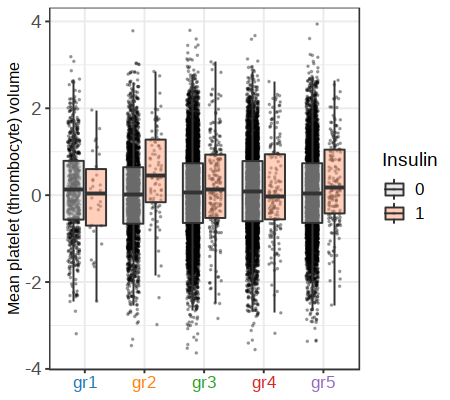

In [17]:
options(repr.plot.width = 4.5, repr.plot.height = 4, repr.plot.res = 100)

# plot specific treatment response
#pheno_name <- 'Platelet distribution width'
treat_name <- 'Insulin'
pheno_name <- 'Mean platelet (thrombocyte) volume'
#a = res_treat[res_treat$pheno_Field %in% pheno_name,]
a = res_treat
a[order(a$pvalue_diff)[1:10],]

pheno_id <- phenoInfo$pheno_id[phenoInfo$Field == pheno_name]
#treat_id <- treatInfo$pheno_id[treatInfo$Coding_meaning == treat_name]
treat_id <- '6153_6177_3'
cl <- res_cl$cl_best

df <- data.frame(id = cl$id, gr = cl$gr, 
                 pheno = phenoDat[match(cl$id, phenoDat$Individual_ID), pheno_id], 
                 #pheno_or = phenoOriginal[match(cl$id, paste0('X',phenoOriginal$new_userId)), paste0('x', pheno_id, '_0_0')],
                 treat = treatDat[match(cl$id, treatDat$Individual_ID), paste0('p', treat_id)])

df$gr <- paste0('gr',df$gr)
df$gr <- factor(df$gr, levels = paste0('gr', sort(unique(cl$gr))))
df$treat <- factor(df$treat)
# remove NA values:
df <- df[!is.na(df$treat) & !is.na(df$pheno),]


gr_color <- pal_d3(palette = 'category20')(length(unique(df$gr)))

#pl_box_original <-  ggplot(df, aes(x = gr, y = pheno_or, fill = treat))+
#  geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
#  geom_boxplot(outlier.shape = NA, alpha = 0.5)+
#  theme_bw()+ 
#  ylim(15,70)+
#  ylab(pheno_name)+
# theme(legend.position = 'right', legend.title = element_text(size = 13), legend.text = element_text(size = 12), #        plot.title = element_text(size=12), axis.title.x = element_blank(),
#        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
# scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

#pl_box_original

pl_box <-  ggplot(df, aes(x = gr, y = pheno, fill = treat))+
  geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
  geom_boxplot(outlier.shape = NA, alpha = 0.5)+
  theme_bw()+ 
  ylab(pheno_name)+
  theme(legend.position = 'right', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
 scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

pl_box

# save
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.png', out_fold, pheno_id, treat_id), plot = pl_box_original, width = 4.5, height = 4, dpi = 300)
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', out_fold, pheno_id, treat_id), plot = pl_box_original, width = 4.5, height = 4)

ggsave(filename = sprintf('%sPheno_%s_treat%s.png', out_fold, pheno_id, treat_id), plot = pl_box, width = 4.5, height = 4, dpi = 300)
ggsave(filename = sprintf('%sPheno_%s_treat%s.pdf', out_fold, pheno_id, treat_id), plot = pl_box, width = 4.5, height = 4)
